In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%pip install -U scikit-learn scipy matplotlib

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/2d/30/3afb8bcb785653254eb646ff2680ec4d637b40b06f4b046aca17b5e086b0/scikit_learn-1.3.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/96/9b/10048be0c335327077af430c5a6637c0b9e7fe9121a8048836f1bb022a81/scipy-1.11.1-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.1 kB ? eta -:--:--
     -------------------------------------- 59.1/59.1 kB 788.8 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b

In [6]:
%pip install catboost

     ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
     ---------------------------------------- 0.2/101.0 MB 3.5 MB/s eta 0:00:29
     ---------------------------------------- 0.5/101.0 MB 4.9 MB/s eta 0:00:21
     ---------------------------------------- 0.7/101.0 MB 5.1 MB/s eta 0:00:20
     ---------------------------------------- 1.0/101.0 MB 5.3 MB/s eta 0:00:20
     ---------------------------------------- 1.2/101.0 MB 5.2 MB/s eta 0:00:20
      --------------------------------------- 1.5/101.0 MB 5.2 MB/s eta 0:00:19
      --------------------------------------- 1.7/101.0 MB 5.2 MB/s eta 0:00:19
      --------------------------------------- 2.0/101.0 MB 5.3 MB/s eta 0:00:19
      --------------------------------------- 2.2/101.0 MB 5.2 MB/s eta 0:00:19
      --------------------------------------- 2.4/101.0 MB 5.2 MB/s eta 0:00:19
     - -------------------------------------- 2.7/101.0 MB 5.2 MB/s eta 0:00:20
     - -------------------------------------- 2

In [8]:
%pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB 330.3 kB/s eta 0:03:35
   ---------------------------------------- 0.2/70.9 MB 1.4 MB/s eta 0:00:52
   ---------------------------------------- 0.5/70.9 MB 2.5 MB/s eta 0:00:29
   ---------------------------------------- 0.8/70.9 MB 3.0 MB/s eta 0:00:24
    --------------------------------------- 1.0/70.9 MB 3.3 MB/s eta 0:00:21
    --------------------------------------- 1.3/70.9 MB 3.7 MB/s eta 0:00:19
    --------------------------------------- 1.6/70.9 MB 4.0 MB/s eta 0:00:18
   - -------------------------------------- 

In [55]:
%pip install math

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


In [56]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
import math

In [57]:
df = pd.read_csv("data/stud.csv")

In [58]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [59]:
X = df.drop(columns=['math_score'],axis=1)

In [60]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [61]:
y = df['math_score']

In [62]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [63]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude = "object").columns
print (num_features)

cat_features = X.select_dtypes(include = "object").columns
print (cat_features)


Index(['reading_score', 'writing_score'], dtype='object')
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [64]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)



In [65]:
X = preprocessor.fit_transform(X)

In [66]:
X 

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [67]:
X.shape

(1000, 19)

In [68]:
# separate dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=42)
X_train.shape, X_test.shape

((700, 19), (300, 19))

In [162]:
# Model Training and Predicting

def model_pred_eval(model):
        # Training the model
    model.fit(X_train, y_train)

        # Predicting using the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

        # Evaluate Train and Test dataset
    model_train_mae  = np.mean(np.abs(y_train - y_train_pred))
    model_train_rmse = math.sqrt(np.square(np.subtract(y_train, y_train_pred)).mean())
    model_train_r2   = r2_score(y_train, y_train_pred)


    model_test_mae  = np.mean(np.abs(y_test - y_test_pred))
    model_test_rmse = math.sqrt(np.square(np.subtract(y_test, y_test_pred)).mean())
    model_test_r2   = r2_score(y_test, y_test_pred)

#    plt.scatter(y_test, y_test_pred)
#    plt.xlabel('Actual')
#    plt.ylabel('Predicted')

#    sns.regplot(x = y_test,y = y_test_pred, ci = None, color = "red")

    return model_train_mae, model_train_rmse, model_train_r2, model_test_mae, model_test_rmse, model_test_r2


In [163]:
# Model Names:
models_dict = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
 
r2_train_list = []
r2_test_list  = []

models_list = []


In [164]:
# Model Building, Predicting, Printing Test-Train Results:

for i in models_dict:
    model = models_dict[i]

    model_train_mae, model_train_rmse, model_train_r2, model_test_mae, model_test_rmse, model_test_r2 = model_pred_eval(model)
    # Printing Results
    print (i, "Performance Results:\n")    

    print("Model performance for Training set")
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- R2 Score: {:.4f}".format(model_train_r2))
 
    print("-"*35)

    print("Model performance for Test set")
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- R2 Score: {:.4f}".format(model_test_r2)) 

    print("="*35)
    print("\n") 

    print (model_test_r2)
    r2_train_list.append(model_train_r2)
    r2_test_list.append(model_test_r2)

    models_list.append(i)


Linear Regression Performance Results:

Model performance for Training set
- Mean Absolute Error: 4.2077
- Root Mean Squared Error: 5.2675
- R2 Score: 0.8742
-----------------------------------
Model performance for Test set
- Mean Absolute Error: 4.4779
- Root Mean Squared Error: 5.6330
- R2 Score: 0.8725


0.8724693130062864
Lasso Performance Results:

Model performance for Training set
- Mean Absolute Error: 5.1582
- Root Mean Squared Error: 6.5106
- R2 Score: 0.8078
-----------------------------------
Model performance for Test set
- Mean Absolute Error: 5.3929
- Root Mean Squared Error: 6.8705
- R2 Score: 0.8103


0.8102810073900306
Ridge Performance Results:

Model performance for Training set
- Mean Absolute Error: 4.1977
- Root Mean Squared Error: 5.2487
- R2 Score: 0.8751
-----------------------------------
Model performance for Test set
- Mean Absolute Error: 4.4155
- Root Mean Squared Error: 5.5566
- R2 Score: 0.8759


0.875906778443454
K-Neighbors Regressor Performance Resu

In [165]:
pd.DataFrame(list(zip(models_list, r2_test_list)), columns=["Model Name", "R2_Test_Score"]).sort_values(by=["R2_Test_Score"],ascending=False)

,Model Name,R2_Test_Score
2,Ridge,0.875907
0,Linear Regression,0.872469
7,CatBoosting Regressor,0.852108
5,Random Forest Regressor,0.846941
6,XGBRegressor,0.842395
8,AdaBoost Regressor,0.833190
1,Lasso,0.810281
3,K-Neighbors Regressor,0.772328
4,Decision Tree,0.727195


**Linear Regression:**

In [166]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.25


Text(0, 0.5, 'Predicted')

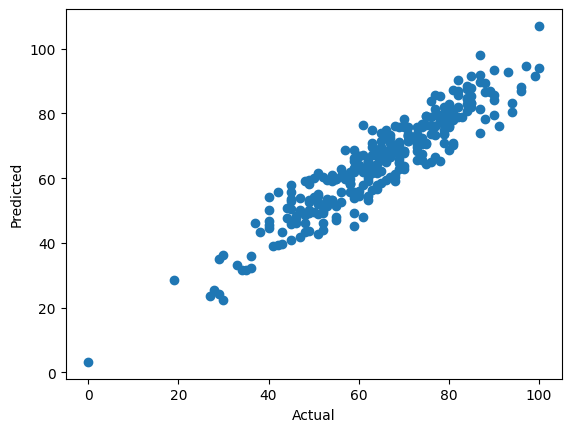

In [167]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

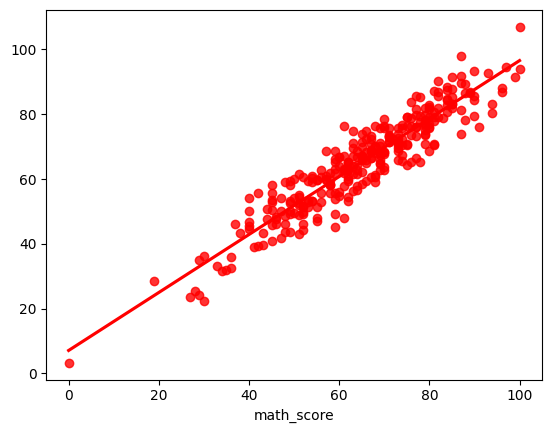

In [169]:
sns.regplot(x = y_test, y = y_pred, ci = None, color = "red")

In [170]:
pred_df = pd.DataFrame({"Actual Value" : y_test, "Predicted Value" : y_pred, "Difference" : y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.125,14.875
737,53,59.500,-6.500
740,80,77.125,2.875
660,74,76.750,-2.750
411,84,88.500,-4.500
...,...,...,...
468,77,73.250,3.750
935,70,62.750,7.250
428,65,58.375,6.625
7,40,44.500,-4.500
